# Twitter Sentiment Analysis

In [1]:
#Importing Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shashidhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shashidhar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#Reading twitter
twitter=pd.read_csv("train.csv")

In [3]:
twitter.head

<bound method NDFrame.head of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
5          6      0  [2/2] huge fan fare and big talking before the...
6          7      0   @user camping tomorrow @user @user @user @use...
7          8      0  the next school year is the year for exams.ð...
8          9      0  we won!!! love the land!!! #allin #cavs #champ...
9         10      0   @user @user welcome here !  i'm   it's so #gr...
10        11      0   â #ireland consumer price index (mom) climb...
11        12      0  we are so selfish. #orlando #standwithorlando ...
12        13      0  i get to see my daddy toda

In [4]:
twitter.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

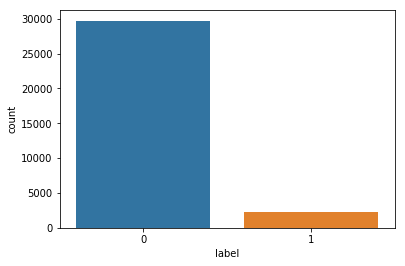

In [5]:
sns.countplot(twitter.label)


In [6]:
twitter.shape #size of data

(31962, 3)

In [7]:
twitter.isna().sum() #Null Values

id       0
label    0
tweet    0
dtype: int64

In [8]:
twitter.describe() #Statistical data

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


Cleaning with nltk 

In [9]:
#Removing stopwords on train file
from nltk.corpus import stopwords
stop=stopwords.words("english")
stop.extend(["i'm","I'm"])

twitter.tweet=twitter.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
twitter.head()

,id,label,tweet
0,1,0,@user father dysfunctional selfish drags kids ...
1,2,0,@user @user thanks #lyft credit can't use caus...
2,3,0,bihday majesty
3,4,0,#model love u take u time urð±!!! ððð...
4,5,0,factsguide: society #motivation


In [10]:
def clean(a):
    a=' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)"," ",a).split())
    return a

In [11]:
#Removing Hyperlinks and user ID on train file
twitter.tweet = twitter.tweet.apply(clean)
twitter.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,user thanks lyft credit can't use cause offer ...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [12]:
#Applying Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
w = WordNetLemmatizer()
twitter.tweet=twitter.tweet.apply(lambda x:' '.join([w.lemmatize(word,'v') for word in x.split()])) # v stands for verb
twitter.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drag kid dysfunct...
1,2,0,user thank lyft credit can't use cause offer w...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [13]:
twitter.tweet=twitter.tweet.apply(lambda a:' '.join([word.lower() for word in a.split()]))

Applying same techniques for test data for cleaning

In [14]:
#Removing stopwords
test = pd.read_csv("test.csv")
#Removing Stopwards
test.tweet=test.tweet.apply(lambda a: ' '.join([word for word in a.split() if word not in (stop)]))
#Removing Hyperlinks,userIDS
test.tweet = test.tweet.apply(clean)
#Applying Lemmatization
w1 = WordNetLemmatizer()
test.tweet=test.tweet.apply(lambda a:' '.join([w1.lemmatize(word,'v') for word in a.split()])) 
test.tweet=test.tweet.apply(lambda a:' '.join([word.lower() for word in a.split()]))

Applying TFIDF Vectorizer for train and test data

In [16]:
#Applying TFIDF Vectorizer to train and test data
from sklearn.feature_extraction.text import TfidfVectorizer
t = TfidfVectorizer()
new = t.fit_transform(twitter.tweet)
new
test_inp = t.transform(test.tweet)
test_inp

<17197x35865 sparse matrix of type '<class 'numpy.float64'>'
	with 123657 stored elements in Compressed Sparse Row format>

SMOTE

In [ ]:
#upsampling 
#downsampling

In [17]:
#Importing Smote
from imblearn.combine import SMOTETomek
s = SMOTETomek(random_state=42)
a,b=s.fit_sample(new,twitter.label)

In [18]:
print(a.shape)
print(b.shape)

(59440, 35865)
(59440,)


In [19]:
b.value_counts()

0    29720
1     2242
Name: label, dtype: int64

Navie Bayes Method

In [20]:
#Navie Bayes Method
#Importing BernNB
from sklearn.naive_bayes import MultinomialNB
m = MultinomialNB()
m.fit(a,b)

MultinomialNB()

In [24]:
#Prediction
m_train=m.predict(a)
m_test=m.predict(test_inp)

In [26]:
# Classification report 
from sklearn.metrics import classification_report
print("Report on Train")
print(classification_report(b,m_train))
print('----------------------------------------------------------------')

Report on Train
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     29720
           1       0.95      0.99      0.97     29720

    accuracy                           0.97     59440
   macro avg       0.97      0.97      0.97     59440
weighted avg       0.97      0.97      0.97     59440

----------------------------------------------------------------
Report on Test
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     16282
           1       0.36      0.90      0.52       915

    accuracy                           0.91     17197
   macro avg       0.68      0.91      0.74     17197
weighted avg       0.96      0.91      0.93     17197



In [28]:
# recall on test data
from sklearn.metrics import recall_score
recall_score(test1.label,m_test)

0.9038251366120219

In [29]:
# Testing On New Message using multinomial NB from train data
new_message = pd.Series("retweet if you agree!")
new_message_transformed = t.transform(new_message)
m.predict(new_message_transformed)

array([1], dtype=int64)

In [30]:
# Testing On New Message using multinomial NB from train data
new_message = pd.Series("i get to see my daddy today!!   #80days #gettingfed")
new_message_transformed = t.transform(new_message)
m.predict(new_message_transformed)

array([0], dtype=int64)

Logistic Regression

In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(a,b)

LogisticRegression()

In [31]:
#Prediction
lg_train_pred=reg.predict(a)
lg_test_pred=reg.predict(test_inp)

In [33]:
#Classification Report 
from sklearn.metrics import classification_report,recall_score
print("Report on train")
print(classification_report(b,lg_train_pred))
print('----------------------------------------------------------------')
print('----------------------------------------------------------------')

Report on train
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     29720
           1       0.97      0.97      0.97     29720

    accuracy                           0.97     59440
   macro avg       0.97      0.97      0.97     59440
weighted avg       0.97      0.97      0.97     59440

----------------------------------------------------------------
----------------------------------------------------------------
Report on Test
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     16282
           1       0.46      0.93      0.62       915

    accuracy                           0.94     17197
   macro avg       0.73      0.94      0.79     17197
weighted avg       0.97      0.94      0.95     17197



# Conclusion:

We have performed two methods on twiter sentiment analyish which are Navie Bayes and Logistic regression in order to find out if a tweet is giving a postive response or negative response.

Out of this both the methods Logistic regression gave better accurracy which is 0.933333333333 while Navie bayes was 0.903825136612. Therefore we can consider logistic regression as the best method to differentiate between if a tweet is a negative or postive one.